# Atrial Fibrulation/ Heart Failure/ Cardio-Vascular Disease TPM Analysis Workbook
### by Vignesh Venkat 
Version 3

In [11]:
#For Matrix Manipulation and Data Management
import pandas as pd
import numpy as np

#For Machine Learning and Feature Analysis
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix

#For Data Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## Atrial Fibrulation Analysis 

### Data Pre-Processing & Exploratory Data Analsysis

In [12]:
atrial_df = pd.read_csv('AF_Data.csv')
atrial_df.fillna('Other',inplace=True)

In [13]:
atrial_df.head()

,ID,Gender,Race,Age,Type,SCN1B,NPPA-AS1,KCNQ1,KCNE1,VKORC1,...,ABCC9,KCNJ2-AS1,CFAP20,KCNJ2,MYBPC3,KCNE3,PF4,PPBP,MYL4,Unnamed: 27
0,1058,Female,White,72,Case,0,0,1.54,0,6.32,...,0,0,0,0,0,6.58,71.65,85.25,56.28,Other
1,1059,Male,White,79,Case,1.94,2.1,19.34,7.55,24.91,...,0,0,10.39,19.87,1.64,56.16,139.47,176.3,16.52,Other
2,1060,Male,Other,58,Case,0,0,0,0,1.88,...,0,0,0,0,0,1.31,16.58,18.73,56.81,Other
3,1061,Male,White,70,Case,0,0,1.13,0,3.61,...,0,0,0,0,0,6.62,64.82,74.13,29.15,Other
4,1062,Male,White,67,Case,0,0,0,0,0,...,0,0,0,0,0,1.83,48.03,42.61,87.86,Other


In [14]:
atrial_df.describe()

,ID,Gender,Race,Age,Type,SCN1B,NPPA-AS1,KCNQ1,KCNE1,VKORC1,...,ABCC9,KCNJ2-AS1,CFAP20,KCNJ2,MYBPC3,KCNE3,PF4,PPBP,MYL4,Unnamed: 27
count,167,167,167,167,167,167,167,167,167,167,...,167,167,167,167,167,167,167,167,167,167
unique,72,3,6,38,3,24,22,66,29,67,...,7,6,40,40,16,69,72,72,71,1
top,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other,...,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other
freq,96,96,106,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,167


In [15]:
#Ensuring that the Data is labelled correctly and standardizing the labels
atrial_df.loc[atrial_df['Race'] == 'White ', 'Race'] = 'White'

In [16]:
#Assigning Values based on EHR data (Clinical Standard)
atrial_df.loc[atrial_df['Race'] == 'Other', 'Race'] = 6
atrial_df.loc[atrial_df['Race'] == 'White', 'Race'] = 1
atrial_df.loc[atrial_df['Race'] == 'Black', 'Race'] = 2
atrial_df.loc[atrial_df['Race'] == 'Asian', 'Race'] = 19
atrial_df.loc[atrial_df['Race'] == 'Decline to Answer', 'Race'] = 7


In [17]:
atrial_df['Race'].unique()

array([1, 6, 19, 2, 7], dtype=object)

In [18]:
#Assigning Values for Gender based on EHR Data
atrial_df.loc[atrial_df['Gender'] == 'Other', 'Gender'] = 999
atrial_df.loc[atrial_df['Gender'] == 'Female', 'Gender'] = 1
atrial_df.loc[atrial_df['Gender'] == 'Male', 'Gender'] = 2

In [19]:
atrial_df['Gender'].unique()

array([1, 2, 999], dtype=object)

In [20]:
atrial_df.drop(atrial_df.index[atrial_df['Age'] == 'Other'],inplace = True)

In [21]:
atrial_df['Age']

0     72
1     79
2     58
3     70
4     67
      ..
66    34
67    62
68    62
69    72
70    60
Name: Age, Length: 71, dtype: object

In [22]:
le = preprocessing.LabelEncoder()
le.fit(atrial_df['Type'])
atrial_df['Type'] = le.transform(atrial_df['Type'])

### Splitting the Matrix into two Sub-matrices

In [23]:
clinicalandtarget_features = ['Gender', 'Race', 'Age', 'Type']
clinical_atrial_df = atrial_df[clinicalandtarget_features]

clinical_atrial_df.head()

,Gender,Race,Age,Type
0,1,1,72,0
1,2,1,79,0
2,2,6,58,0
3,2,1,70,0
4,2,1,67,0


In [24]:
clinical_af_features = clinical_atrial_df[['Gender', 'Race', 'Age']]
y = atrial_df['Type']

X_c_af_train, X_c_af_test, y_train,y_test = train_test_split(clinical_af_features, y, 
                                                                test_size=0.3, random_state = 42)
                                                                
X_c_af_train.head()

,Gender,Race,Age
44,2,2,71
28,2,2,65
7,1,1,51
54,2,1,72
50,1,2,57


### Atrial Fibrulation Clinical Feature Selection 

In [25]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_c_af_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

<BarContainer object of 3 artists>

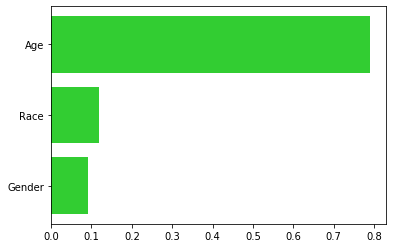

In [26]:
f_i = list(zip(clinical_af_features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i],color='#32CD32')

In [27]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 3)
fit = chisq_selected_features.fit(X_c_af_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_c_af_train.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ['Clinical Feature', 'Score']
print(featuresScores.nlargest(3,'Score'))

  Clinical Feature      Score
2              Age  12.983768
1             Race   9.451875
0           Gender   0.150463


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

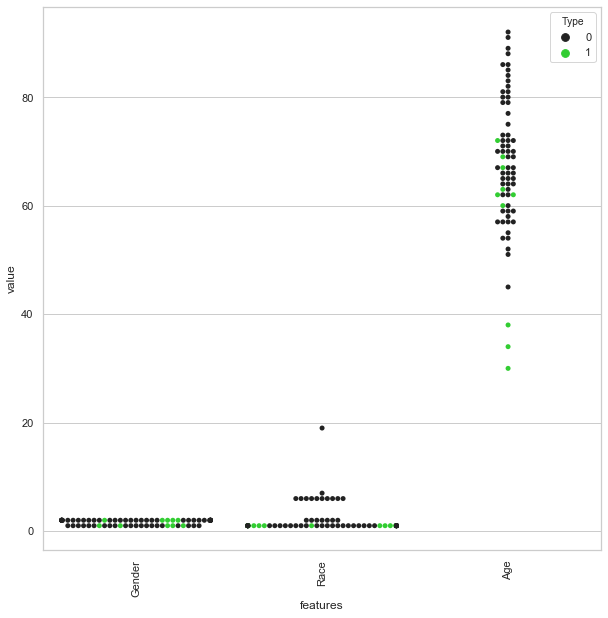

In [28]:
sns.set(style="whitegrid", palette="muted")


clinical_atrial_df_melt = pd.melt(clinical_atrial_df, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Type", data=clinical_atrial_df_melt, edgecolor='black', color = '#32CD32')
plt.xticks(rotation=90)

Based on Analysis, we see Age and Race to be the 2 clinical feature that have correlation to the target feature (predicting AF)

### Atrial Fibrulation Genomic Feature Selection

In [29]:
genomicandtarget_features = ['SCN1B', 'NPPA-AS1', 'KCNQ1', 'KCNE1', 'VKORC1', 'ATF4', 'KCNH2', 'SELP', 'PDE4D', 'ACE', 'PRKAR1B', 'NUP155',
           'CYP4F2', 'ABCC9', 'KCNJ2-AS1', 'CFAP20', 'KCNJ2', 'MYBPC3', 'KCNE3', 'PF4', 'PPBP', 'MYL4', 'Type']
genomic_atrial_df = atrial_df[genomicandtarget_features]

genomic_atrial_df.head()

,SCN1B,NPPA-AS1,KCNQ1,KCNE1,VKORC1,ATF4,KCNH2,SELP,PDE4D,ACE,...,ABCC9,KCNJ2-AS1,CFAP20,KCNJ2,MYBPC3,KCNE3,PF4,PPBP,MYL4,Type
0,0,0,1.54,0,6.32,0,0,0,0,0,...,0,0,0,0,0,6.58,71.65,85.25,56.28,0
1,1.94,2.1,19.34,7.55,24.91,6.41,1.21,3.06,1.32,0,...,0,0,10.39,19.87,1.64,56.16,139.47,176.3,16.52,0
2,0,0,0,0,1.88,0,0,0,0,0,...,0,0,0,0,0,1.31,16.58,18.73,56.81,0
3,0,0,1.13,0,3.61,0,0,0,0,0,...,0,0,0,0,0,6.62,64.82,74.13,29.15,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.83,48.03,42.61,87.86,0


In [30]:
X_tpm = genomic_atrial_df[['SCN1B', 'NPPA-AS1', 'KCNQ1', 'KCNE1', 'VKORC1', 'ATF4', 'KCNH2', 'SELP', 'PDE4D', 'ACE', 'PRKAR1B', 'NUP155',
           'CYP4F2', 'ABCC9', 'KCNJ2-AS1', 'CFAP20', 'KCNJ2', 'MYBPC3', 'KCNE3', 'PF4', 'PPBP', 'MYL4']]
y_tpm = genomic_atrial_df['Type']

X_tpm_train,X_tpm_test, y_train,y_test = train_test_split(X_tpm, y_tpm, train_size = 0.8, test_size=0.2)
X_tpm_train.head()

,SCN1B,NPPA-AS1,KCNQ1,KCNE1,VKORC1,ATF4,KCNH2,SELP,PDE4D,ACE,...,CYP4F2,ABCC9,KCNJ2-AS1,CFAP20,KCNJ2,MYBPC3,KCNE3,PF4,PPBP,MYL4
67,1.31,1.72,13.01,8,16.38,5.01,0,3.09,1.78,1.54,...,3.14,0,0,9.19,6.11,2.08,45.06,53.6,64.17,53.19
54,0,0,1.16,0,6.19,0,1.04,0,0,0,...,0,0,0,0,0,0,5.83,58.59,81.24,22.56
9,0,0,2.61,0,18.81,0,0,0,10.04,0,...,0,0,0,0,0,0,4.18,161.63,167.12,30.81
59,0,0,1.52,0,1.75,0,0,0,0,0,...,0,0,0,0,0,0,0,45.46,28.44,43.72
21,0,0,2.64,0,4.64,0,0,0,0,0,...,0,0,0,0,0,0,7.35,17.38,21.03,52.05


In [31]:
rf1 = RandomForestRegressor(random_state=0)
rf1.fit(X_tpm_train,y_train)

feature_tpm_selector1 = RFECV(rf1,cv=5) #5-fold Cross Validation to make sure
feature_tpm_selector1.fit(X_tpm_train,y_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=0,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [32]:
f_i = list(zip(['SCN1B', 'NPPA-AS1', 'KCNQ1', 'KCNE1', 'VKORC1', 'ATF4', 'KCNH2', 'SELP', 'PDE4D', 'ACE', 'PRKAR1B', 'NUP155',
           'CYP4F2', 'ABCC9', 'KCNJ2-AS1', 'CFAP20', 'KCNJ2', 'MYBPC3', 'KCNE3', 'PF4', 'PPBP', 'MYL4'],rf1.feature_importances_))
f_i.sort(key = lambda x : x[1])

<BarContainer object of 22 artists>

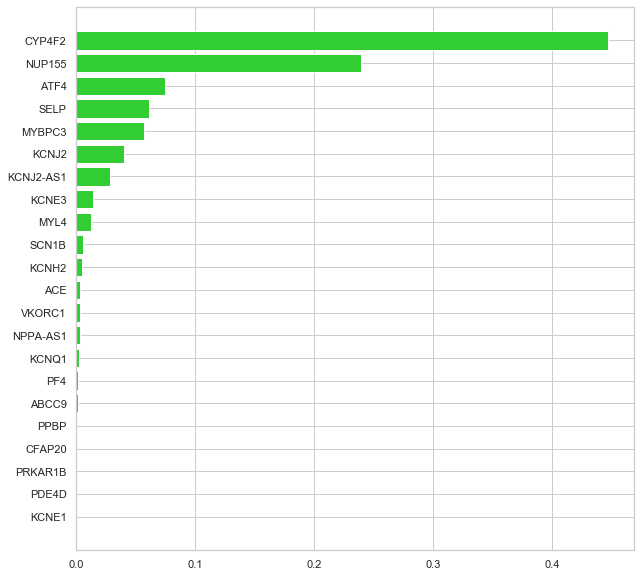

In [33]:
from matplotlib.pyplot import figure

plt.figure(figsize = (10,10))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = '#32CD32')

#CYP4F2, NUP155, SELP, MYBPC3, KCNJ2-AS1, KCNJ2, ATF4

In [34]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 7)
fit = chisq_selected_features.fit(X_tpm_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_tpm_train.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ['Genomic Feature', 'Score']
print(featuresScores.nlargest(7,'Score'))

#CYP4F2, SELP, MYBPC3, NUP155, KCNJ2-AS1, ATF4, KCNJ2
#KCNE3, KCNJ2, NUP155, CFAP20, CYP4F2, ATF4, SELP

#Common: CYP4F2,SELP,KCNJ2,NUP155, ATF4
# Count-in: KCNE3 



   Genomic Feature       Score
18           KCNE3  195.919282
16           KCNJ2  125.357883
20            PPBP  101.596096
11          NUP155   86.563182
12          CYP4F2   84.213221
5             ATF4   80.145262
15          CFAP20   74.541426


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

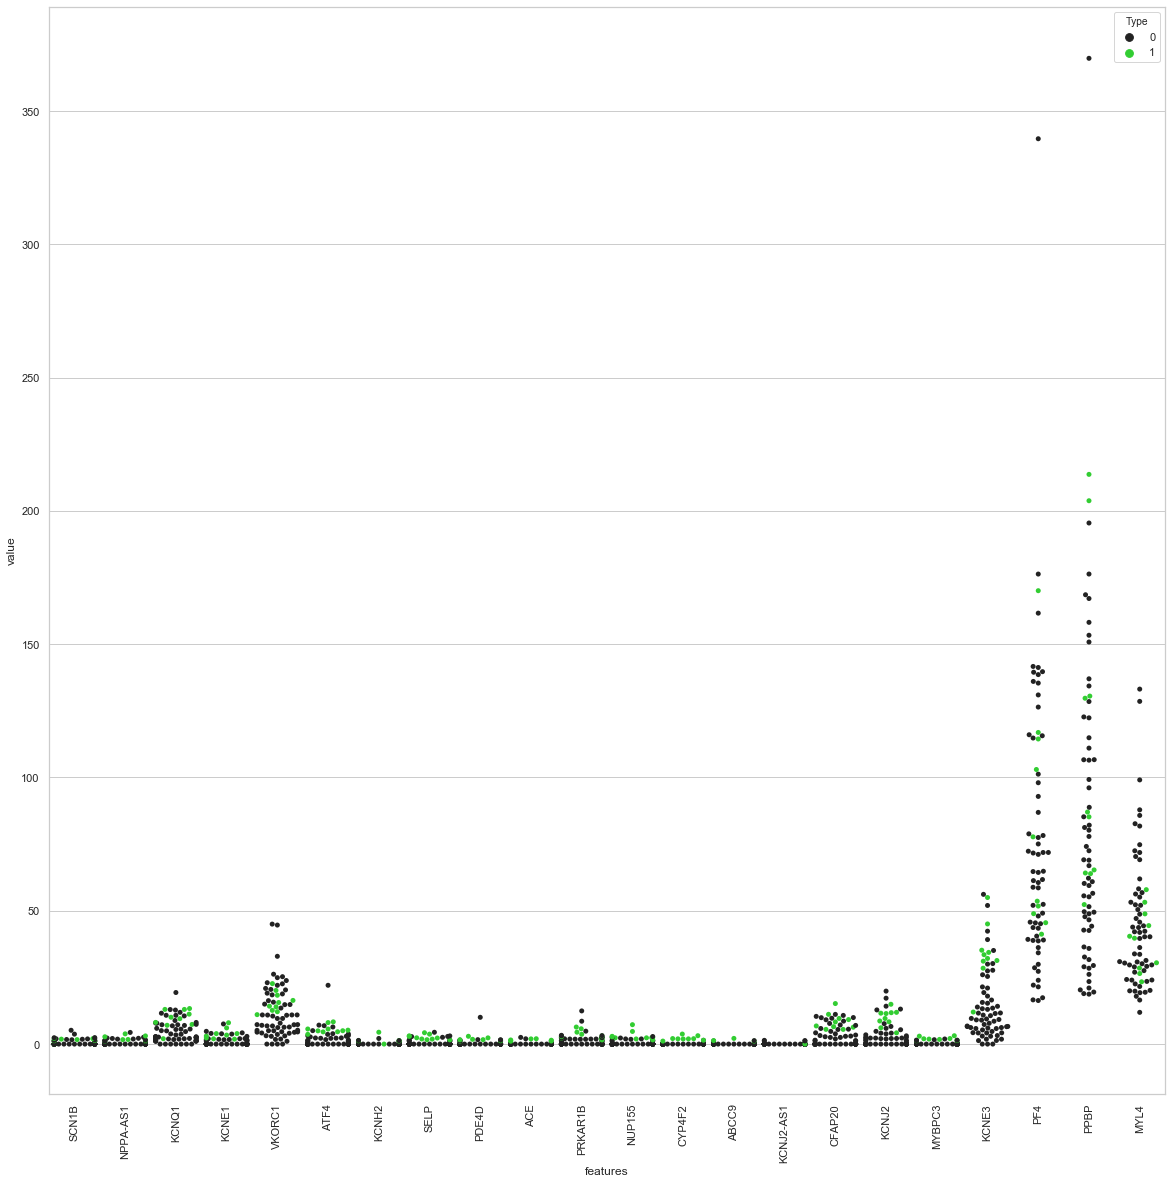

In [35]:
sns.set(style="whitegrid", palette="muted")

genomic_atrial_df_melt = pd.melt(genomic_atrial_df, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(20,20))
sns.swarmplot(x="features", y="value", hue="Type", data=genomic_atrial_df_melt, color = '#32CD32')
plt.xticks(rotation=90)

In [36]:
from  matplotlib.colors import LinearSegmentedColormap

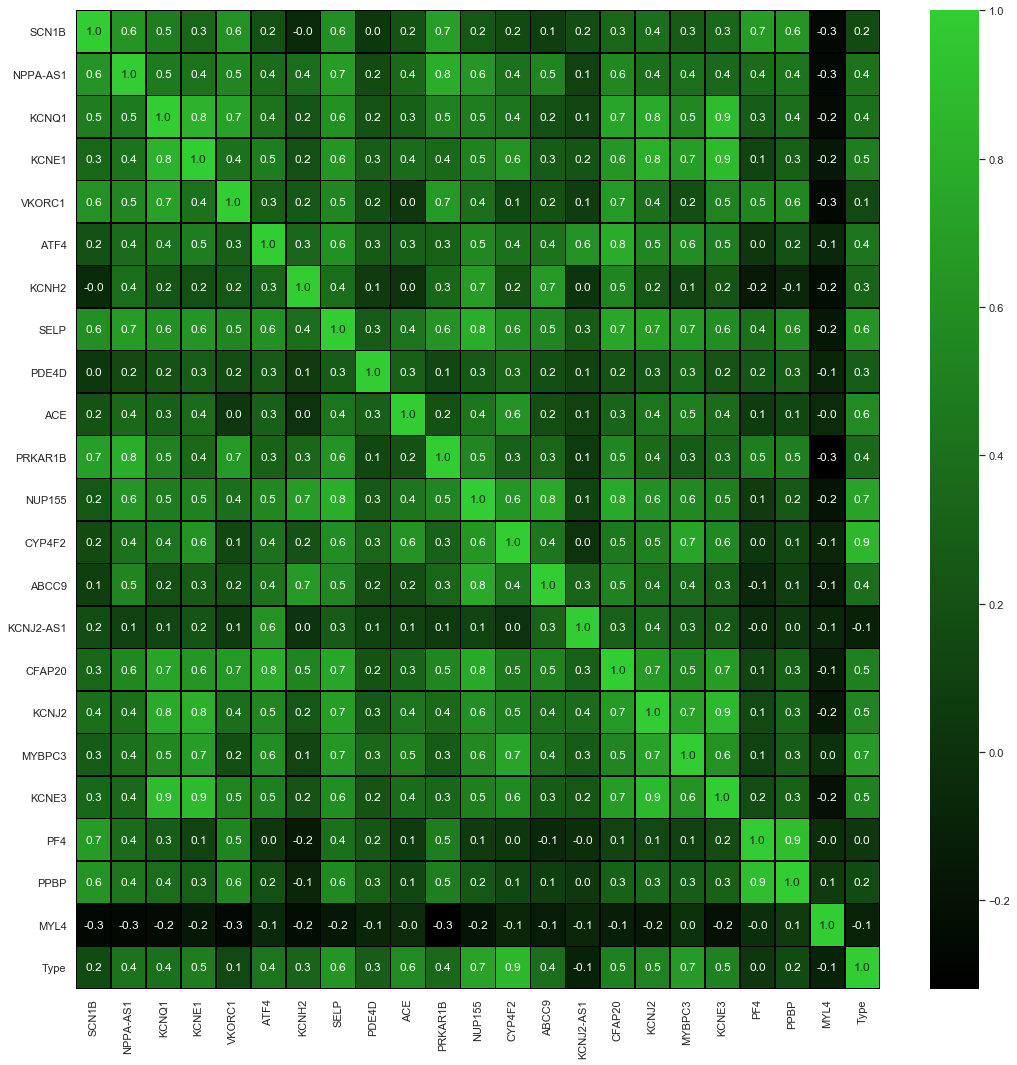

In [37]:
genomic_atrial_df=genomic_atrial_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_atrial_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#32CD32"], N=256), 
                        linecolor = 'black')

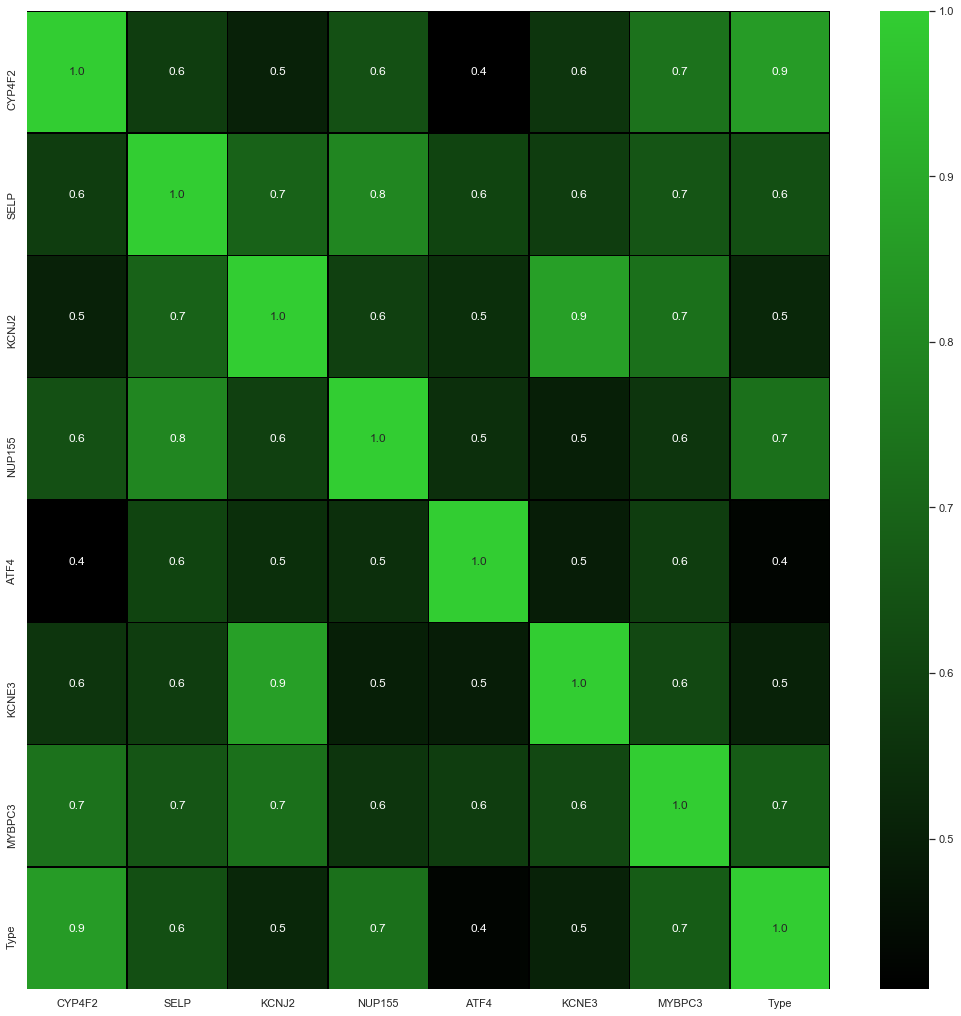

In [38]:
best_genes_af = ["CYP4F2","SELP","KCNJ2","NUP155", "ATF4", "KCNE3", "MYBPC3", "Type"]
genomic_atrial_df_1 = genomic_atrial_df[best_genes_af]

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_atrial_df_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, 
                        cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#32CD32"], N=256), 
                        linecolor = 'black')

Accuracy is:  0.9545454545454546


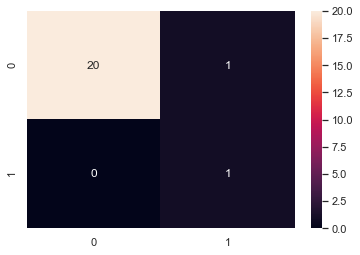

In [39]:
X_tpm_features_1 = genomic_atrial_df_1[["CYP4F2","SELP","KCNJ2","NUP155", "ATF4", "KCNE3", "MYBPC3"]]
y = genomic_atrial_df_1["Type"]

x_train, x_test, y_train, y_test = train_test_split(X_tpm_features_1, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## Heart Failure Analysis

### Heart Failure Data Pre-Processing

In [40]:
heart_df = pd.read_csv("HF_Data.csv")
heart_df.head()

,ID,Gender,Race,Age,Type,ADRB1,EPO,AMPD1,MMP2,NPR1,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,648,Male,White,30,Control,0.01,0.01,0.00,0.09,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,649,Male,White,38,Control,0.05,0.02,0.00,0.02,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,650,Male,White,69,Control,0.13,0.04,0.00,0.03,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,651,Female,White,67,Control,0.07,0.00,0.01,0.07,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,652,Male,White,63,Control,0.06,0.02,0.00,0.02,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
heart_df.fillna('Other',inplace=True)

In [42]:
heart_df.describe()

,ID,Age,ADRB1,EPO,AMPD1,MMP2,NPR1,PIK3C2A,EDN1,NR3C2,...,CDKN2B-AS1,UTS2,NPPC,VCL,ADRB2,TNF,ADM,MME,CST3,LGALS3
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1026.718310,67.380282,0.027324,0.011549,0.011408,0.009155,0.000563,0.777746,0.128028,0.387887,...,0.072958,1.094366,0.000563,7.090141,3.319718,2.793944,12.040282,17.634930,158.816338,90.321831
std,153.320503,12.567948,0.043226,0.021821,0.084283,0.022913,0.002872,1.429100,0.290903,1.046428,...,0.174294,2.275026,0.004747,10.610717,2.835932,2.186221,12.475628,26.013828,144.012868,46.552062
min,648.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000,10.250000,21.340000
25%,1065.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.365000,0.995000,1.065000,2.900000,2.000000,56.490000,58.395000
50%,1083.000000,67.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.140000,0.010000,0.050000,...,0.000000,0.370000,0.000000,1.160000,2.130000,2.150000,7.640000,5.680000,120.480000,84.200000
75%,1100.500000,74.000000,0.045000,0.020000,0.000000,0.005000,0.000000,0.675000,0.180000,0.350000,...,0.085000,0.790000,0.000000,8.980000,5.680000,4.415000,17.315000,17.840000,222.400000,105.835000
max,1118.000000,92.000000,0.250000,0.090000,0.710000,0.110000,0.020000,8.660000,2.230000,8.280000,...,1.380000,12.030000,0.040000,43.290000,12.710000,9.320000,70.770000,104.400000,819.710000,279.960000


In [43]:
print(heart_df['Gender'].unique())
print(heart_df['Race'].unique())
print(heart_df['Age'].unique())


['Male' 'Female']
['White' 'White ' 'Other' 'Asian' 'Black' 'Decline to Answer']
[30 38 69 67 63 34 62 72 60 79 58 70 66 54 51 82 65 57 52 91 89 81 59 45
 73 92 86 85 64 55 77 83 71 80 84 75 88]


In [44]:
#Ensuring that the Data is labelled correctly and standardizing the labels
heart_df.loc[heart_df['Race'] == 'White ', 'Race'] = 'White'

In [45]:
heart_df.loc[heart_df['Race'] == 'Other', 'Race'] = 6
heart_df.loc[heart_df['Race'] == 'White', 'Race'] = 1
heart_df.loc[heart_df['Race'] == 'Black', 'Race'] = 2
heart_df.loc[heart_df['Race'] == 'Asian', 'Race'] = 19
heart_df.loc[heart_df['Race'] == 'Decline to Answer', 'Race'] = 7

In [46]:
heart_df.loc[heart_df['Gender'] == 'Other', 'Gender'] = 999
heart_df.loc[heart_df['Gender'] == 'Female', 'Gender'] = 1
heart_df.loc[heart_df['Gender'] == 'Male', 'Gender'] = 2

In [47]:
le = preprocessing.LabelEncoder()
le.fit(heart_df['Type'])
heart_df['Type'] = le.transform(heart_df['Type'])

### Heart Failure Splitting into 2 Sub-Matrices

In [48]:
clinicalandtarget_features = ['Gender', 'Race', 'Age', 'Type']
clinical_heart_df = heart_df[clinicalandtarget_features]

clinical_heart_df.head()

,Gender,Race,Age,Type
0,2,1,30,1
1,2,1,38,1
2,2,1,69,1
3,1,1,67,1
4,2,1,63,1


In [49]:
clinical_hf_features = clinical_heart_df[['Gender', 'Race', 'Age']]
y = heart_df['Type']

X_c_hf_train, X_c_hf_test, y_train,y_test = train_test_split(clinical_hf_features, y, 
                                                                test_size=0.3, random_state = 42)
                                                                
X_c_hf_train.head()

,Gender,Race,Age
44,2,1,62
28,2,1,45
7,1,1,62
54,2,2,71
50,2,6,83


### Heart Failure Clinical Feature Selection

In [50]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_c_hf_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

<BarContainer object of 3 artists>

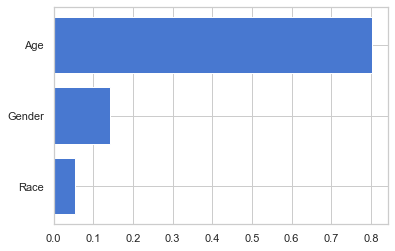

In [51]:
f_i = list(zip(clinical_hf_features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

In [52]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 3)
fit = chisq_selected_features.fit(X_c_hf_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_c_hf_train.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ['Clinical Feature', 'Score']
print(featuresScores.nlargest(3,'Score'))

  Clinical Feature     Score
1             Race  4.497416
2              Age  4.132736
0           Gender  0.053429


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

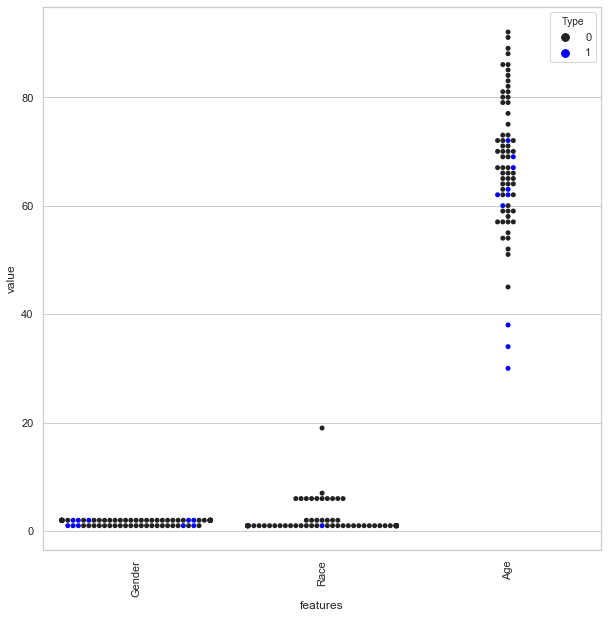

In [53]:
sns.set(style="whitegrid", palette="muted")


clinical_heart_df_melt = pd.melt(clinical_heart_df, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Type", data=clinical_heart_df_melt, color = "blue")
plt.xticks(rotation=90)

### Heart Failure Genomic Feature Selection

In [54]:
heart_features = ["ADRB1","EPO","AMPD1","MMP2",
                    "NPR1","PIK3C2A","EDN1","NR3C2","ACE","NOS3","CORIN","HSPB7"
                    ,"ANKRD1","MYH7","IL6","MYBPC3","NPPA","CDKN2B-AS1","UTS2","NPPC","VCL"
                    ,"ADRB2","TNF","ADM","MME","CST3","LGALS3", "Type"]
genomic_heart_df = heart_df[heart_features]

genomic_heart_df.head()

,ADRB1,EPO,AMPD1,MMP2,NPR1,PIK3C2A,EDN1,NR3C2,ACE,NOS3,...,UTS2,NPPC,VCL,ADRB2,TNF,ADM,MME,CST3,LGALS3,Type
0,0.01,0.01,0.00,0.09,0.0,2.21,0.30,0.92,1.07,0.68,...,0.44,0.0,27.76,5.02,4.43,27.97,50.15,172.82,54.86,1
1,0.05,0.02,0.00,0.02,0.0,2.97,0.30,1.31,1.15,0.48,...,0.42,0.0,25.12,5.85,4.03,17.81,60.75,225.86,67.15,1
2,0.13,0.04,0.00,0.03,0.0,3.25,0.37,1.00,2.00,0.77,...,0.40,0.0,21.84,7.63,4.68,23.08,86.67,108.92,51.94,1
3,0.07,0.00,0.01,0.07,0.0,3.75,0.59,1.38,0.98,0.78,...,0.46,0.0,26.98,6.42,4.66,28.05,81.65,226.82,63.02,1
4,0.06,0.02,0.00,0.02,0.0,1.43,0.28,0.24,0.76,0.33,...,0.41,0.0,21.11,5.82,4.75,44.59,35.60,226.52,77.39,1


In [55]:
X_heart = genomic_heart_df[["ADRB1","EPO","AMPD1","MMP2",
                    "NPR1","PIK3C2A","EDN1","NR3C2","ACE","NOS3","CORIN","HSPB7"
                    ,"ANKRD1","MYH7","IL6","MYBPC3","NPPA","CDKN2B-AS1","UTS2","NPPC","VCL"
                    ,"ADRB2","TNF","ADM","MME","CST3","LGALS3"]]
y_heart = genomic_heart_df["Type"]

In [56]:
X_heart_train,X_heart_test, y_heart_train,y_heart_test = train_test_split(X_heart, y_heart, test_size=0.3)
X_heart_train.head()

,ADRB1,EPO,AMPD1,MMP2,NPR1,PIK3C2A,EDN1,NR3C2,ACE,NOS3,...,CDKN2B-AS1,UTS2,NPPC,VCL,ADRB2,TNF,ADM,MME,CST3,LGALS3
32,0.11,0.00,0.0,0.00,0.0,0.03,0.00,0.01,0.35,0.07,...,0.00,1.07,0.00,0.39,2.11,1.43,3.52,2.61,100.57,94.43
37,0.00,0.00,0.0,0.00,0.0,0.08,0.03,0.08,0.11,0.46,...,0.03,0.32,0.04,2.52,1.55,1.49,12.86,6.53,199.63,126.58
47,0.07,0.03,0.0,0.00,0.0,1.52,0.30,0.80,1.09,1.07,...,0.19,0.60,0.00,11.81,8.24,6.13,22.17,25.68,369.88,101.62
5,0.01,0.04,0.0,0.11,0.0,2.23,0.21,1.45,1.31,0.40,...,0.14,0.18,0.00,22.81,7.11,4.86,23.24,73.88,120.48,75.29
59,0.03,0.00,0.0,0.00,0.0,0.02,0.18,0.00,0.00,0.00,...,0.00,0.00,0.00,0.96,0.99,0.71,2.20,3.37,74.57,39.68


In [57]:
rf1 = RandomForestRegressor(random_state=0)
rf1.fit(X_heart_train,y_heart_train)

feature_tpm_selector1 = RFECV(rf1,cv=5,scoring="neg_mean_squared_error") #5-fold Cross Validation to make sure
feature_tpm_selector1.fit(X_heart_train,y_heart_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=0,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [58]:
f_i = list(zip(["ADRB1","EPO","AMPD1","MMP2",
                    "NPR1","PIK3C2A","EDN1","NR3C2","ACE","NOS3","CORIN","HSPB7"
                    ,"ANKRD1","MYH7","IL6","MYBPC3","NPPA","CDKN2B-AS1","UTS2","NPPC","VCL"
                    ,"ADRB2","TNF","ADM","MME","CST3","LGALS3"],rf1.feature_importances_))
f_i.sort(key = lambda x : x[1])

<BarContainer object of 27 artists>

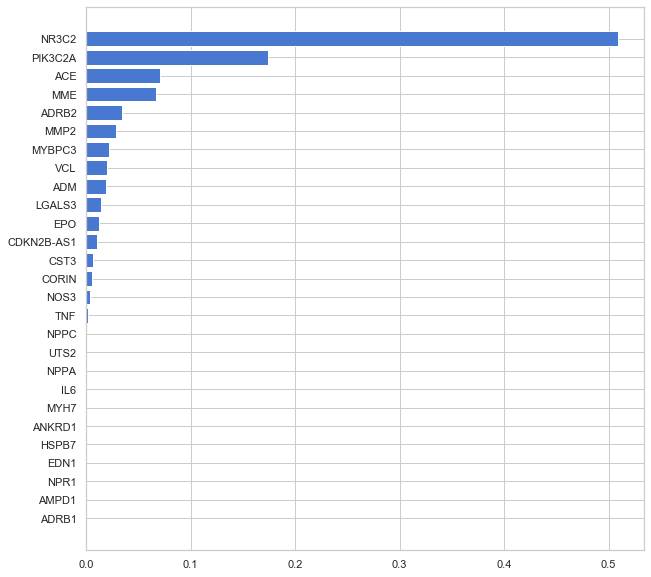

In [59]:
from matplotlib.pyplot import figure

plt.figure(figsize = (10,10))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])



In [60]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 7)
fit = chisq_selected_features.fit(X_heart_train, y_heart_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_heart_train.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ['Genomic Feature', 'Score']
print(featuresScores.nlargest(7,'Score'))
#NR3C2, P1K3C2A, MME, VCL, ACE, LGALS3, MYBPC3, CORIN
#MME, VCL, LGALS3, ADM, PIK3C2A, NR3C2, ADRB2

#Common: NR3C2, P1K3C2A, MME, VCL

featuresScores.to_csv(r'HeartFailure/HFGenomicResults/HF_chi2results.csv', index = False)

   Genomic Feature        Score
24             MME  1067.708815
20             VCL   292.176650
23             ADM    96.240277
5          PIK3C2A    85.975416
26          LGALS3    72.811552
7            NR3C2    60.775463
21           ADRB2    39.723491


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

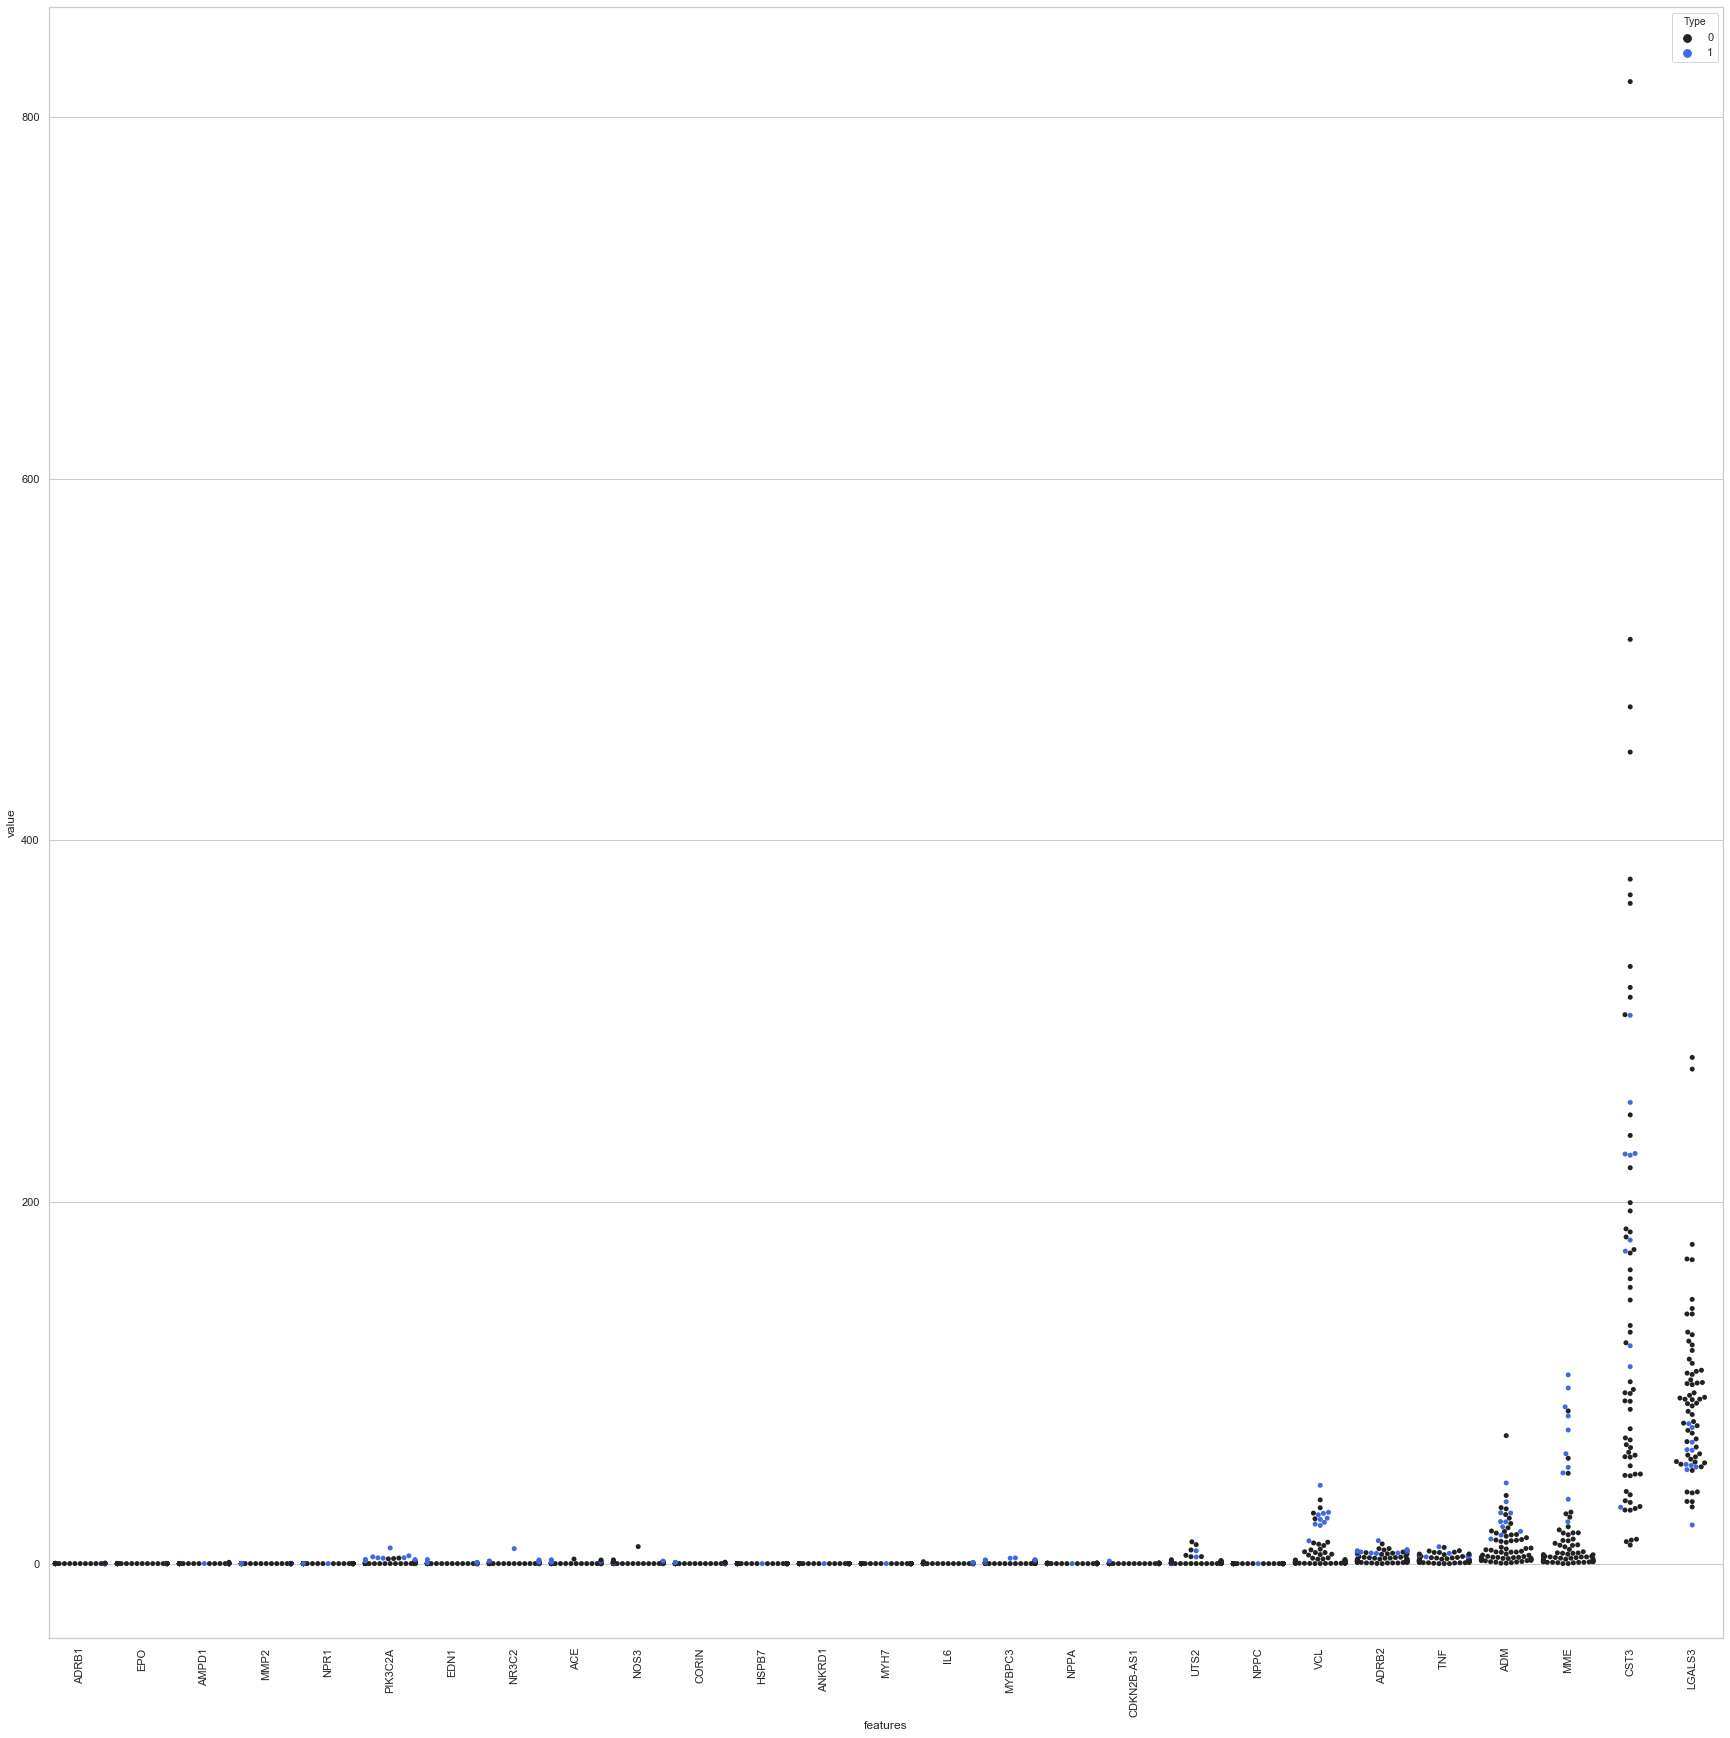

In [89]:
sns.set(style="whitegrid", palette="muted")

genomic_heart_df_melt = pd.melt(genomic_heart_df, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(30,30))
sns.swarmplot(x="features", y="value", hue="Type", data=genomic_heart_df_melt, color = "#4169E1")
plt.xticks(rotation=90)

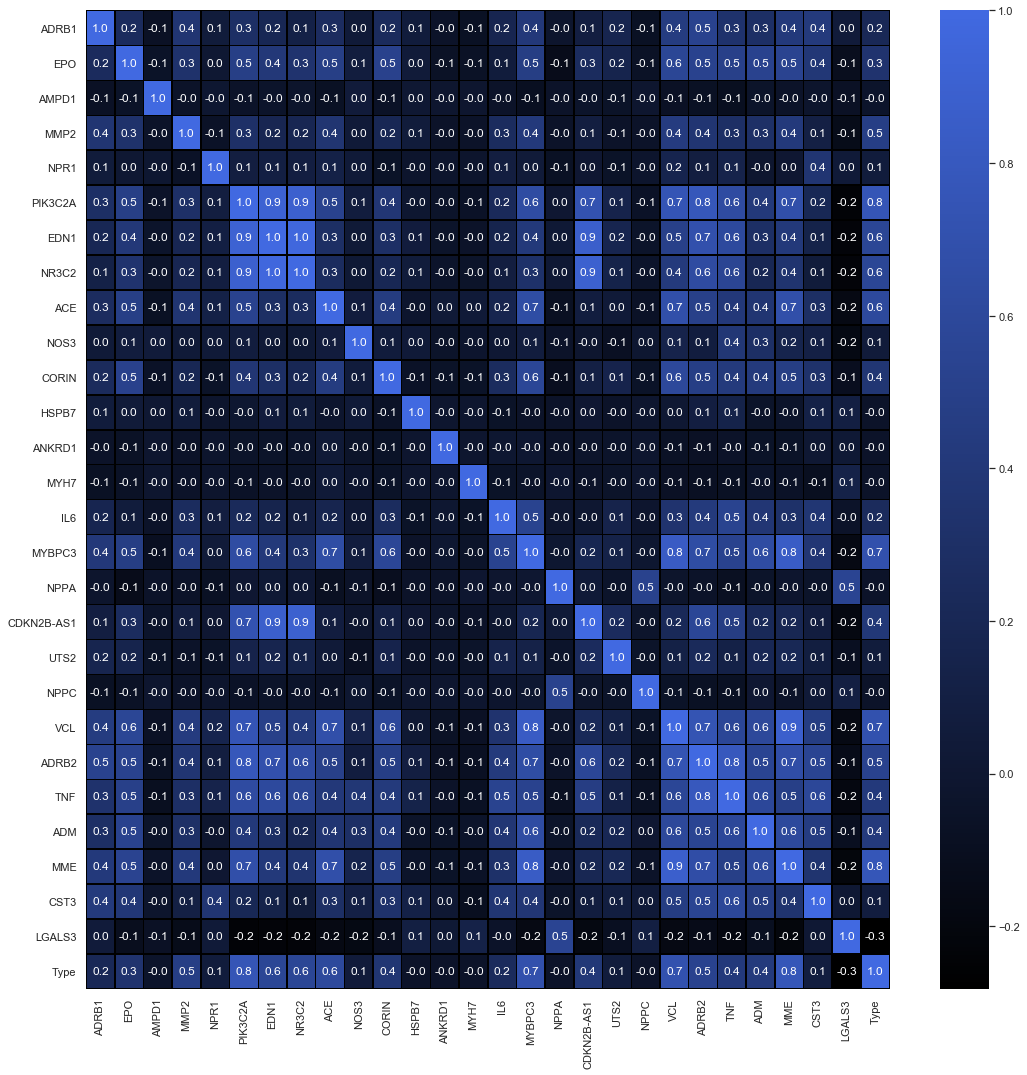

In [90]:
genomic_heart_df=genomic_heart_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_heart_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#4169E1"], N=256), 
                        linecolor = 'black')

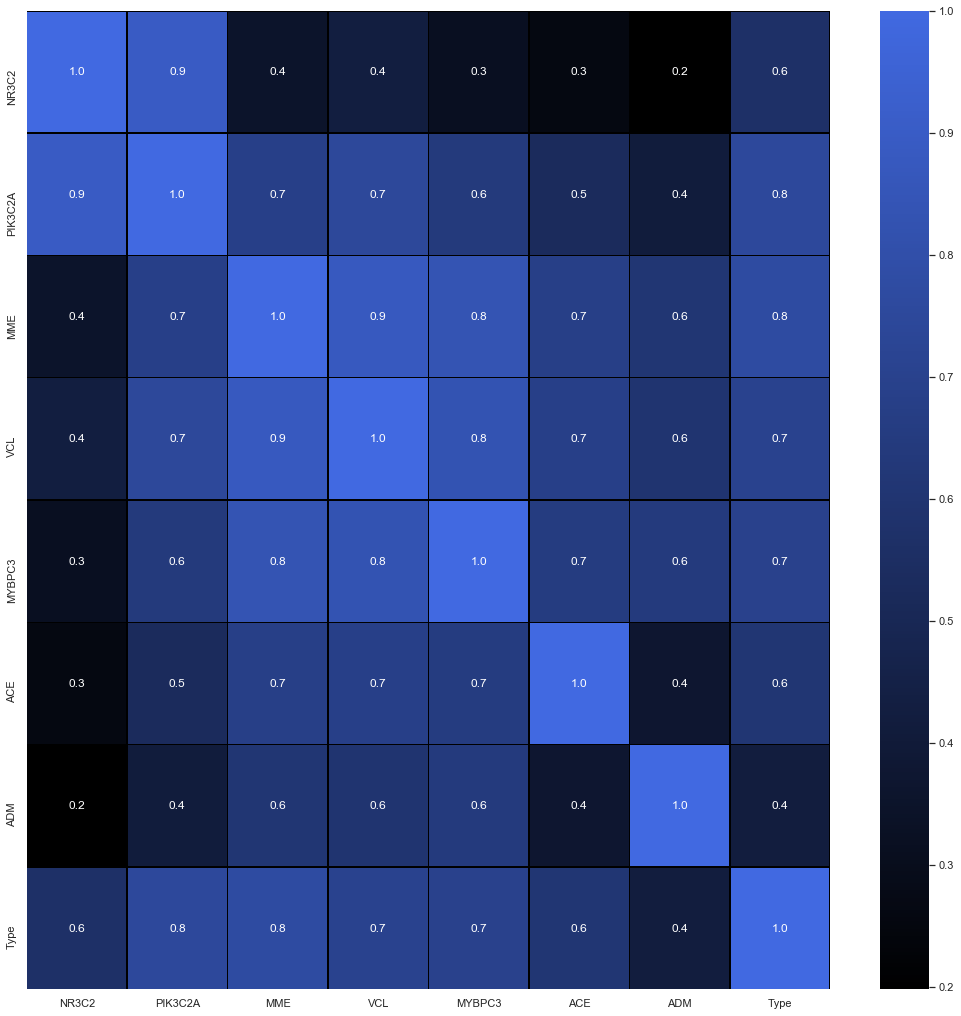

In [91]:
best_genes_hf = ["NR3C2", "PIK3C2A", "MME", "VCL", "MYBPC3", "ACE", "ADM", "Type"]
genomic_heart_df_1 = genomic_heart_df[best_genes_hf]

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_heart_df_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#4169E1"], N=256), 
                        linecolor = 'black')

Accuracy is:  0.9090909090909091


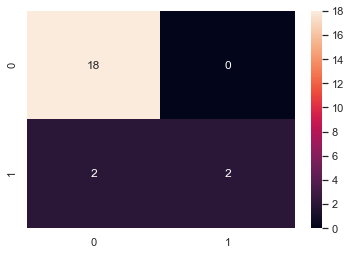

In [57]:
X_tpm_features_1 = genomic_heart_df_1[["NR3C2", "PIK3C2A", "MME", "VCL", "ACE", "MYBPC3", "EDN1"]]
y = genomic_heart_df_1["Type"]

x_train, x_test, y_train, y_test = train_test_split(X_tpm_features_1, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

"NR3C2", "PIK3C2A", "MME", "VCL", "ACE", "MYBPC3" are the features that seem to have the best correlation, leading to a 90% accuracy 

## Other Cardio-Vascular Diseases Analysis

### CVD Data Pre-Processing 

In [101]:
cvd_df = pd.read_csv("CVD_Data.csv")
cvd_df.head()

,ID,Gender,Race,Age,Type,FGF2,TEK,GJB6,CD34,ENO2,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
0,648.0,Male,White,30.0,Control,0.02,0.06,0.15,0.12,9.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,649.0,Male,White,38.0,Control,0.01,0.18,0.14,0.26,9.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,650.0,Male,White,69.0,Control,0.01,0.21,0.27,0.12,11.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,651.0,Female,White,67.0,Control,0.00,0.34,0.12,0.11,12.22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,652.0,Male,White,63.0,Control,0.00,0.05,0.06,0.09,3.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
cvd_df.describe()

,ID,Age,FGF2,TEK,GJB6,CD34,ENO2,CALD1,LEMD3,GLMN,...,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1026.718310,67.380282,0.019718,0.054225,0.049014,0.078732,3.625493,0.089718,1.445775,0.728310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,153.320503,12.567948,0.142237,0.098004,0.073972,0.120723,5.176251,0.130767,2.526688,1.106673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,648.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1065.500000,60.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.130000,0.015000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1083.000000,67.000000,0.000000,0.010000,0.010000,0.030000,1.470000,0.030000,0.320000,0.220000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1100.500000,74.000000,0.000000,0.055000,0.070000,0.115000,6.010000,0.125000,1.430000,1.070000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1118.000000,92.000000,1.200000,0.420000,0.370000,0.620000,29.440000,0.660000,14.950000,7.080000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
cvd_df.fillna('Other',inplace=True)

In [104]:
cvd_df.loc[cvd_df['Race'] == 'White ', 'Race'] = 'White'

In [105]:
cvd_df.loc[cvd_df['Race'] == 'White ', 'Race'] = 'White'
cvd_df.loc[cvd_df['Race'] == 'Other', 'Race'] = 6
cvd_df.loc[cvd_df['Race'] == 'White', 'Race'] = 1
cvd_df.loc[cvd_df['Race'] == 'Black', 'Race'] = 2
cvd_df.loc[cvd_df['Race'] == 'Asian', 'Race'] = 19
cvd_df.loc[cvd_df['Race'] == 'Decline to Answer', 'Race'] = 7

In [106]:
cvd_df.loc[cvd_df['Gender'] == 'Other', 'Gender'] = 999
cvd_df.loc[cvd_df['Gender'] == 'Female', 'Gender'] = 1
cvd_df.loc[cvd_df['Gender'] == 'Male', 'Gender'] = 2

In [107]:
cvd_df.drop(cvd_df.index[cvd_df['Age'] == 'Other'],inplace = True)

In [108]:
print(cvd_df['Gender'].unique())
print(cvd_df['Race'].unique())
print(cvd_df['Age'].unique())

[2 1]
[1 6 19 2 7]
[30.0 38.0 69.0 67.0 63.0 34.0 62.0 72.0 60.0 79.0 58.0 70.0 66.0 54.0
 51.0 82.0 65.0 57.0 52.0 91.0 89.0 81.0 59.0 45.0 73.0 92.0 86.0 85.0
 64.0 55.0 77.0 83.0 71.0 80.0 84.0 75.0 88.0]


In [109]:
le = preprocessing.LabelEncoder()
le.fit(cvd_df['Type'])
cvd_df['Type'] = le.transform(cvd_df['Type'])

### CVD Splitting into 2 Matrices 

In [111]:
clinicalandtarget_features = ['Gender', 'Race', 'Age', 'Type']
clinical_cvd_df = cvd_df[clinicalandtarget_features]

clinical_cvd_df.head()

,Gender,Race,Age,Type
0,2,1,30,1
1,2,1,38,1
2,2,1,69,1
3,1,1,67,1
4,2,1,63,1


In [112]:
clinical_cvd_features = clinical_cvd_df[['Gender', 'Race', 'Age']]
y_cvd = cvd_df['Type']

X_c_cvd_train, X_c_cvd_test, y_cvd_train,y_cvd_test = train_test_split(clinical_cvd_features, y_cvd, 
                                                                test_size=0.3, random_state = 42)
                                                                
X_c_cvd_train.head()

,Gender,Race,Age
44,2,1,62
28,2,1,45
7,1,1,62
54,2,2,71
50,2,6,83


### CVD Clinical Feature Selection

In [114]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_c_cvd_train,y_cvd_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

<BarContainer object of 3 artists>

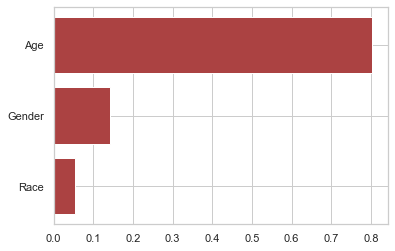

In [115]:
f_i = list(zip(clinical_cvd_features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = '#AB4242')

In [72]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 3)
fit = chisq_selected_features.fit(X_c_cvd_train, y_cvd_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_c_cvd_train.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis = 1)
featuresScores.columns = ['Clinical Feature', 'Score']
print(featuresScores.nlargest(3,'Score'))

  Clinical Feature     Score
1             Race  4.497416
2              Age  4.132736
0           Gender  0.053429


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

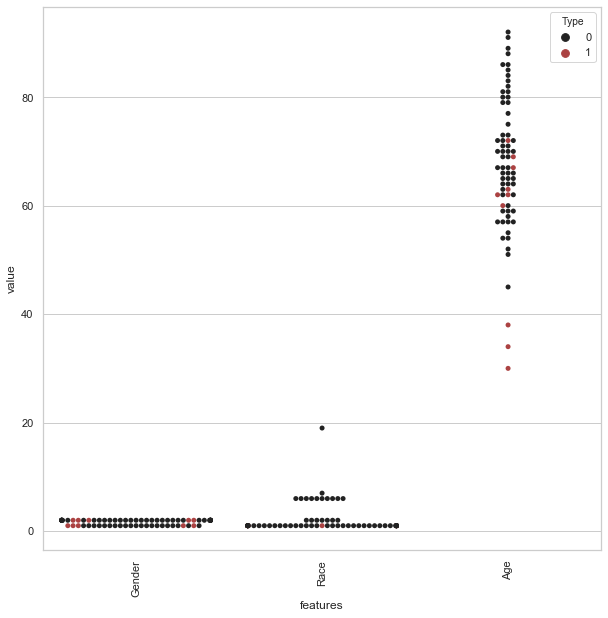

In [116]:
sns.set(style="whitegrid", palette="muted")


clinical_cvd_df_melt = pd.melt(clinical_cvd_df, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="Type", data=clinical_cvd_df_melt, color = '#AB4242')
plt.xticks(rotation=90)

### CVD Genomic Feature Selection

In [117]:
cvd_features = ["FGF2","TEK","GJB6","CD34","ENO2","CALD1","LEMD3","GLMN","ATP2A2","TRPV1","SMUG1","MB","KANTR","CD40LG","ZBTB8OS","DDX41","PDPN"
                    ,"SLC2A1","FADD","FLNA","HBA1", "Type"]
genomic_cvd_df = cvd_df[cvd_features]

genomic_cvd_df.head()

,FGF2,TEK,GJB6,CD34,ENO2,CALD1,LEMD3,GLMN,ATP2A2,TRPV1,...,KANTR,CD40LG,ZBTB8OS,DDX41,PDPN,SLC2A1,FADD,FLNA,HBA1,Type
0,0.02,0.06,0.15,0.12,9.63,0.44,4.89,1.92,10.93,0.14,...,0.23,7.69,8.55,19.59,0,10.58,12.15,199.43,77750.1,1
1,0.01,0.18,0.14,0.26,9.84,0.35,4.85,2.47,14.53,0.33,...,0.11,11.9,9.1,25.92,0,10.65,14.68,247.76,96762.8,1
2,0.01,0.21,0.27,0.12,11.47,0.19,6.06,1.33,11.15,0.61,...,0.07,9.2,7.07,17.1,0,10.08,10.87,176.39,70158.5,1
3,0,0.34,0.12,0.11,12.22,0.24,7.31,2.52,14.53,0.22,...,0.32,7.35,12.65,26.57,0,12.98,16.42,241.59,92901.4,1
4,0,0.05,0.06,0.09,3.15,0.2,3.1,1,9.99,0.14,...,0.06,3.31,8.47,19.4,0,8.36,10.17,217.85,127138,1


In [118]:
X_cvd = genomic_cvd_df[["FGF2","TEK","GJB6","CD34","ENO2","CALD1","LEMD3","GLMN","ATP2A2","TRPV1","SMUG1","MB","KANTR","CD40LG","ZBTB8OS","DDX41","PDPN"
                    ,"SLC2A1","FADD","FLNA","HBA1"]]
y_cvd = genomic_cvd_df["Type"]

In [119]:
X_cvd_train,X_cvd_test, y_cvd_train,y_cvd_test = train_test_split(X_cvd, y_cvd, test_size=0.3)
X_cvd_train.head()

,FGF2,TEK,GJB6,CD34,ENO2,CALD1,LEMD3,GLMN,ATP2A2,TRPV1,...,MB,KANTR,CD40LG,ZBTB8OS,DDX41,PDPN,SLC2A1,FADD,FLNA,HBA1
48,0,0.02,0.07,0.08,7.77,0.1,1.3,1.23,5.95,0,...,0,0.2,8.56,6.95,15.19,0,8.61,7.44,61.82,136692
56,0,0.08,0.23,0.1,1.13,0.07,0.68,0.6,1.01,0.16,...,0,0.26,4.78,23.82,13.7,0,2.76,16.13,60.39,83961.6
49,0,0.06,0.15,0.51,3.4,0.03,2.29,1.7,3.29,0.16,...,0.16,0.85,13.95,10.62,22.1,0,10.99,10.35,69.16,96763.7
24,0,0.02,0,0,0.62,0.38,0.07,0.02,0.29,0.09,...,0,0,0.08,4.9,2.35,0,4.27,1.45,4.26,189882
40,0,0.02,0.04,0.02,5.64,0.11,0.07,0.14,1.06,0.13,...,0,0,1.3,1.95,5.36,0,2.75,3.79,62.23,142558


In [120]:
rf1 = RandomForestRegressor(random_state=0)
rf1.fit(X_cvd_train,y_cvd_train)

feature_tpm_selector1 = RFECV(rf1,cv=5,scoring="neg_mean_squared_error") #5-fold Cross Validation to make sure
feature_tpm_selector1.fit(X_cvd_train,y_cvd_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=0,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [121]:
f_i = list(zip(["FGF2","TEK","GJB6","CD34","ENO2","CALD1","LEMD3","GLMN","ATP2A2","TRPV1","SMUG1","MB","KANTR","CD40LG","ZBTB8OS","DDX41","PDPN"
                    ,"SLC2A1","FADD","FLNA","HBA1"],rf1.feature_importances_))
f_i.sort(key = lambda x : x[1])

<BarContainer object of 21 artists>

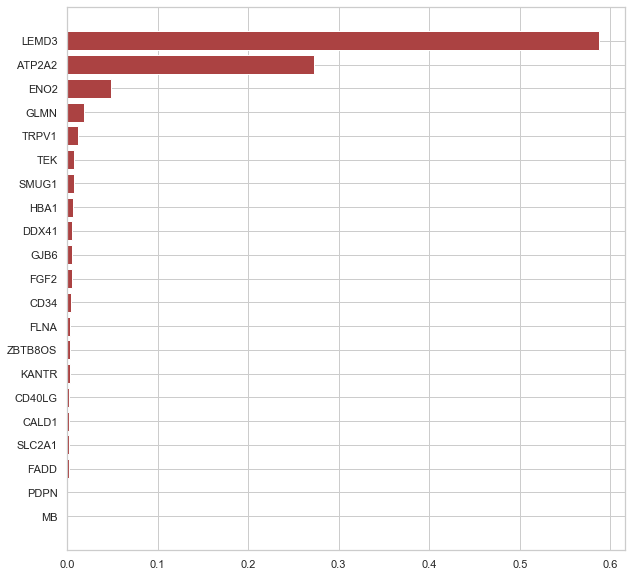

In [122]:
from matplotlib.pyplot import figure

plt.figure(figsize = (10,10))
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], color = '#AB4242')

In [123]:
chisq_selected_features = SelectKBest(score_func = chi2, k = 7)
fit = chisq_selected_features.fit(X_cvd_train, y_cvd_train)
dfscores_cvd = pd.DataFrame(fit.scores_)
dfcolumns_cvd = pd.DataFrame(X_cvd_train.columns)
featuresScores_1 = pd.concat([dfcolumns_cvd, dfscores_cvd], axis = 1)
featuresScores_1.columns = ['Genomic Feature', 'Score']
print(featuresScores_1.nlargest(7,'Score'))
#HBA1, FLNA, ATP2A2, DDX41, LEMD3, ENO2, FADD
#LEMD3, ATP2A2, FLNA, TRPV1, GLMN, SLC2A1, ENO2

#Common: FLNA, ATP2A2, LEMD3, ENO2
#Throw-in: HBA1, SLC2A1, DDX41

   Genomic Feature          Score
20            HBA1  255790.739405
19            FLNA    2036.470184
8           ATP2A2     232.270016
15           DDX41     134.581522
6            LEMD3     130.906955
4             ENO2     118.898098
18            FADD      61.317184


In [124]:
featuresScores_1.to_csv(r'CVD/CVDGenomicResults/Chi2Results.csv', index = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

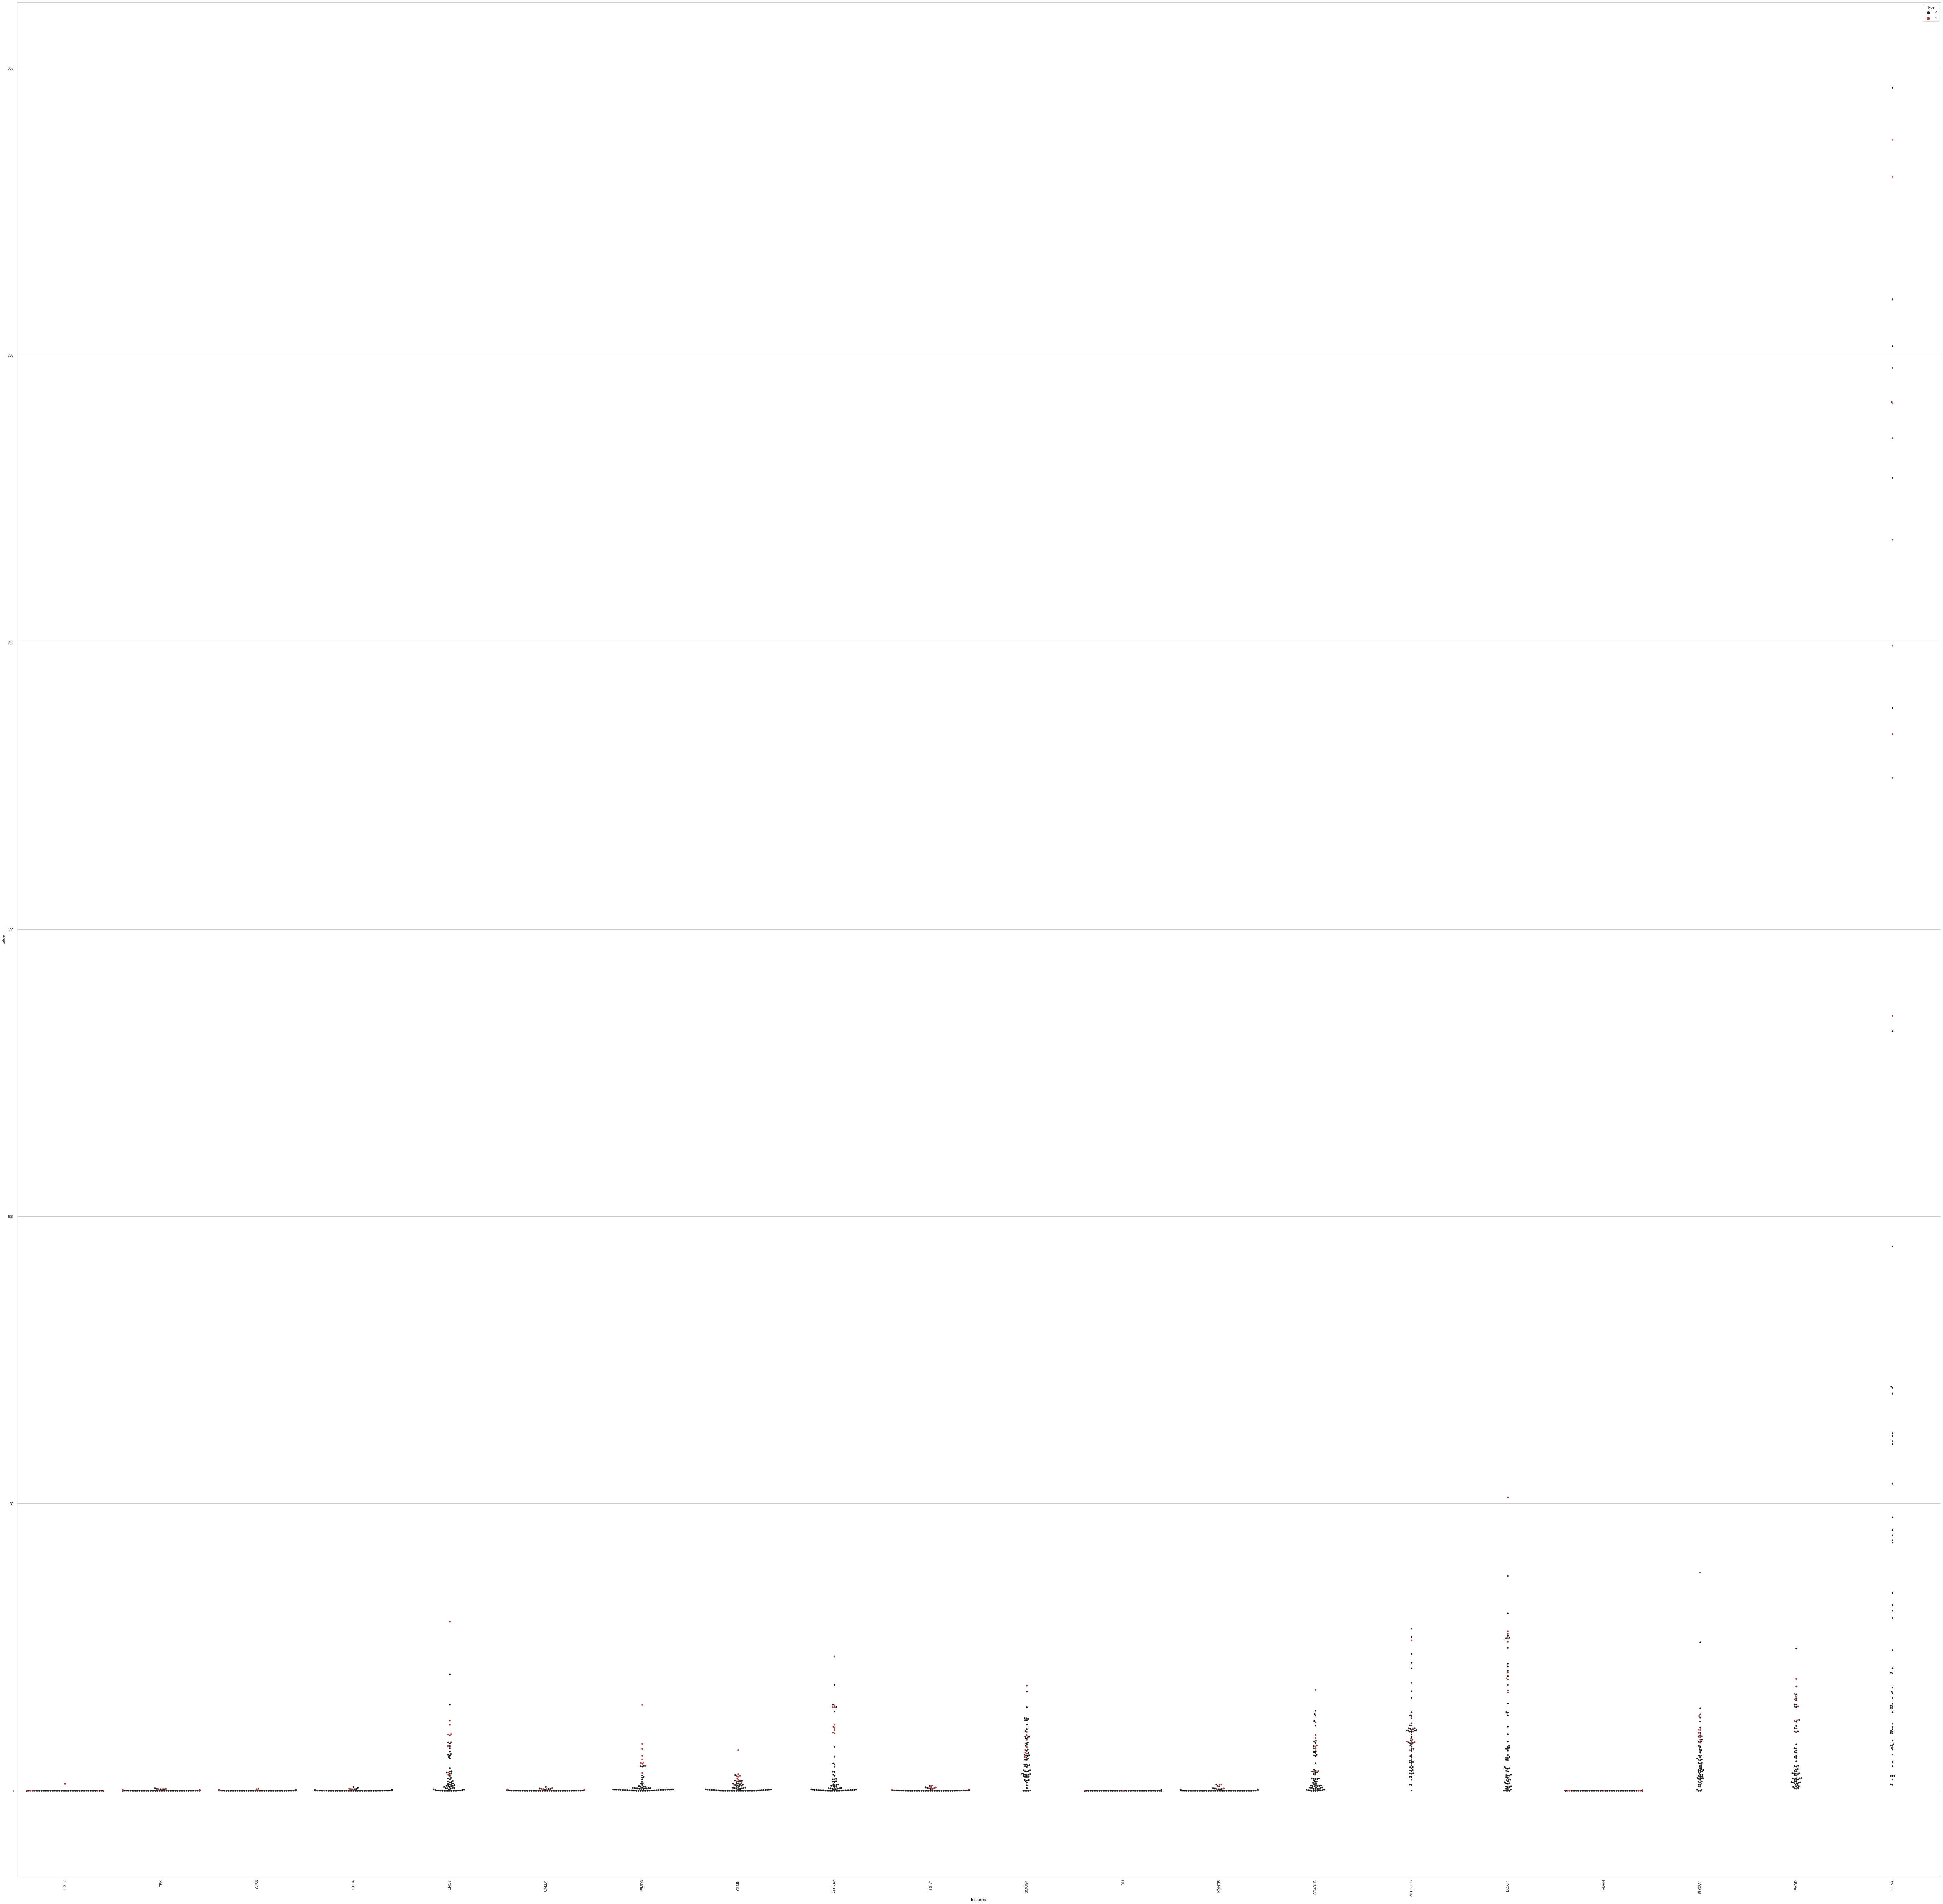

In [125]:
genomic_cvd_df=genomic_cvd_df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
genomic_cvd_df_reduce = genomic_cvd_df[["FGF2","TEK","GJB6","CD34","ENO2","CALD1","LEMD3","GLMN","ATP2A2","TRPV1","SMUG1","MB","KANTR","CD40LG","ZBTB8OS","DDX41","PDPN"
                    ,"SLC2A1","FADD","FLNA", "Type"]]

sns.set(style="whitegrid", palette="muted")

genomic_cvd_df_melt = pd.melt(genomic_cvd_df_reduce, id_vars = "Type",
                                    var_name = "features",
                                    value_name = "value")

plt.figure(figsize=(100,100))
sns.swarmplot(x="features", y="value", hue="Type", data=genomic_cvd_df_melt, color = '#AB4242')
plt.xticks(rotation=90)

In [82]:
#Common: FLNA, ATP2A2, LEMD3, ENO2
#Throw-in: HBA1, SLC2A1, DDX41
best_genes_cvd = [ "FLNA", "ATP2A2", "LEMD3", "ENO2", "HBA1", "SLC2A1", "DDX41", "Type"]

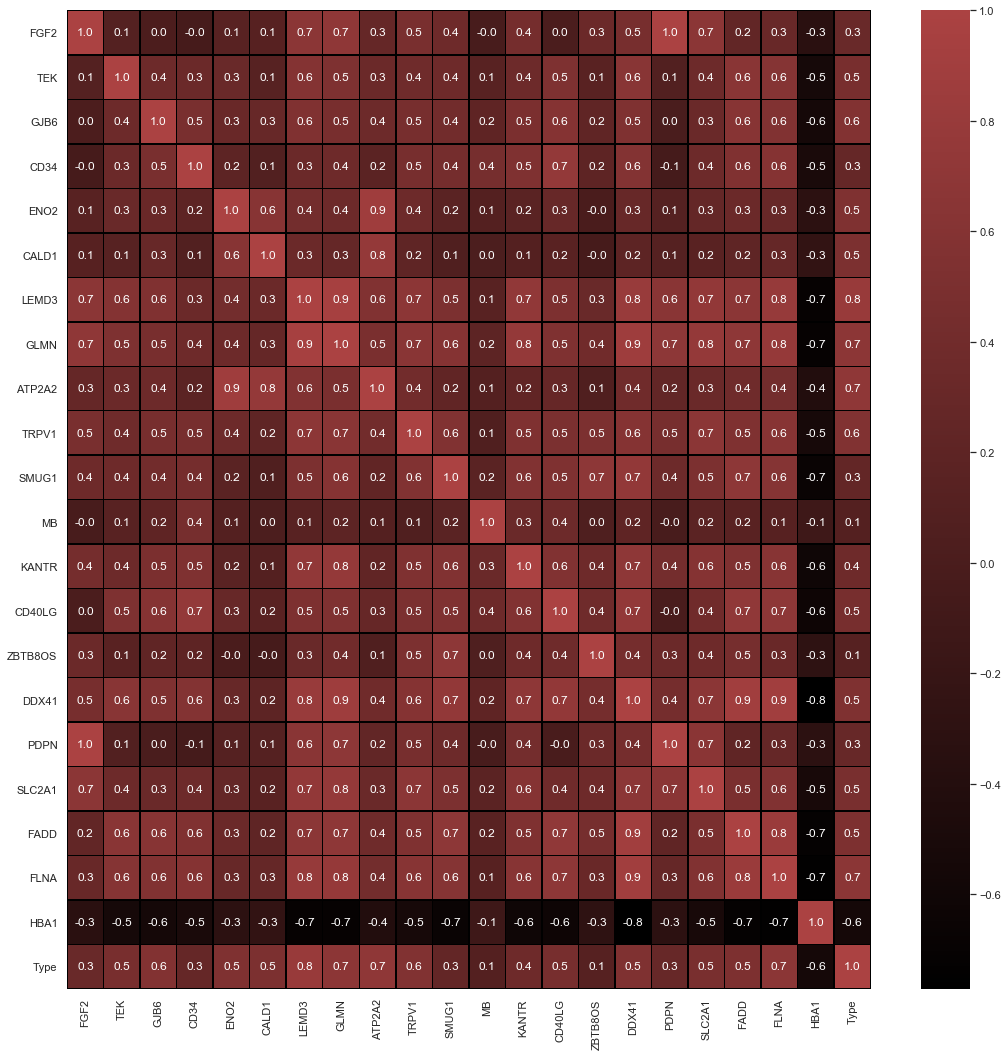

In [126]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_cvd_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#AB4242"], N=256), 
                        linecolor = 'black')

In [128]:
best_genes_cvd = [ "FLNA", "ATP2A2", "LEMD3", "ENO2", "GLMN", "SLC2A1", "DDX41", "Type"]

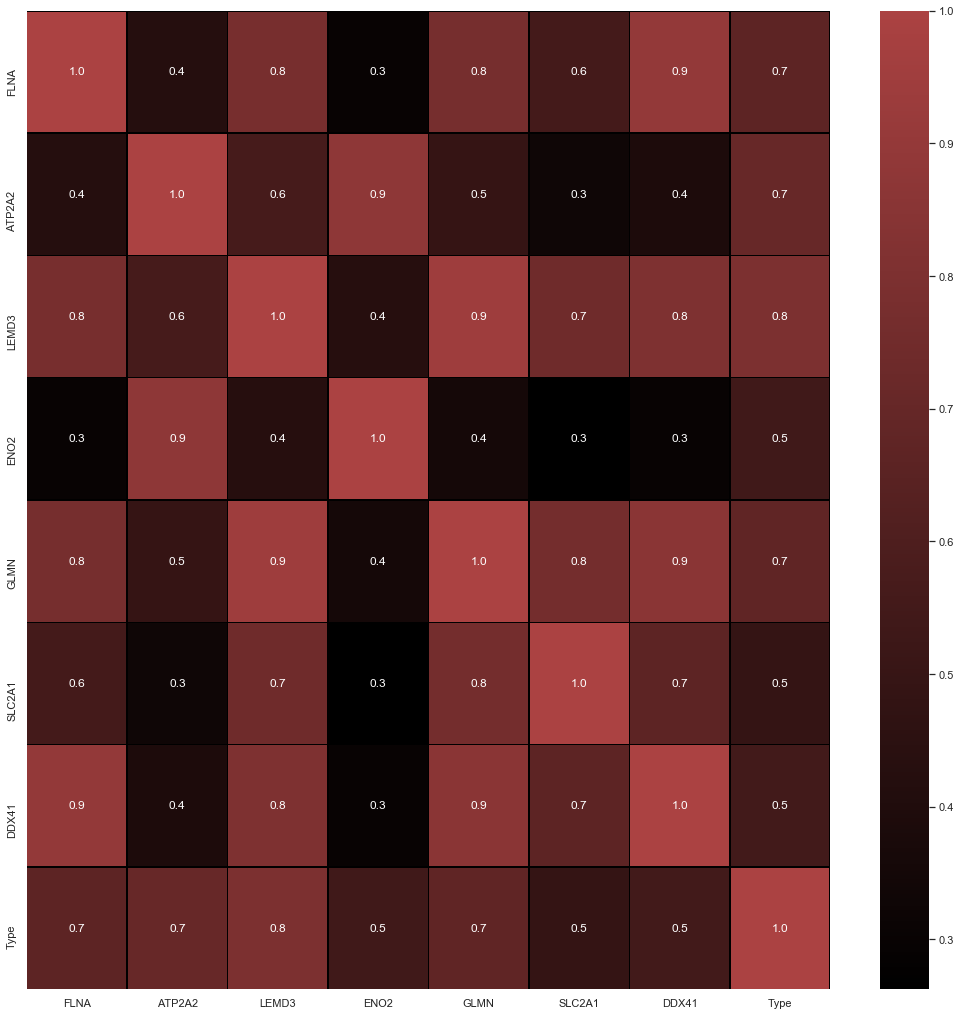

In [129]:
genomic_cvd_df_1 = genomic_cvd_df[best_genes_cvd]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(genomic_cvd_df_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = LinearSegmentedColormap.from_list('rg',[ "black", "#AB4242"], N=256), 
                        linecolor = 'black')

Accuracy is:  0.9545454545454546


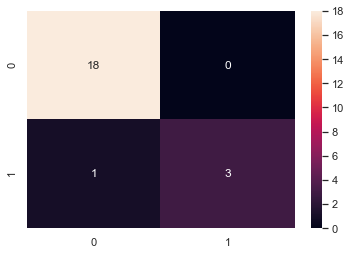

In [86]:
X_tpm_features_1 = genomic_cvd_df_1[["FLNA", "ATP2A2", "LEMD3", "ENO2", "GLMN", "SLC2A1", "DDX41"]]
y = genomic_cvd_df_1["Type"]

x_train, x_test, y_train, y_test = train_test_split(X_tpm_features_1, y, test_size=0.3, random_state=42)

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")